# Check Regression Assumptions

Haytham Mohamed - INFS890 Spring 2020

This notebook is to check regression Normality and Linearity assumptions of the orders work flow.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
from sklearn import preprocessing
from datetime import datetime
from scipy import stats
from sklearn.decomposition import PCA

sns.set()
sns.set(color_codes=True)
#sns.set_color_codes()

pd.options.display.max_rows = 15
pd.options.display.float_format = '{:,.4f}'.format

In [2]:
# 1- read processed file

home_dir = '/Users/hmohamed/github/data-research-spring2020/sock-shop'

file_dir = home_dir + '/processed-data/'
input_file = 'order_flow_cleanup_data.csv'

save=True

In [3]:
def read_df(file_dir, data_file):
    df = pd.read_csv(file_dir + data_file)
    return to_time_series(df)

def to_time_series(df, index_col_name='date'):
    df[index_col_name] = pd.to_datetime(df[index_col_name])
    df.set_index(index_col_name, inplace=True)
    df.sort_index(inplace=True)
    return df

In [4]:
orders_flow_df = read_df(file_dir, input_file)
idx = orders_flow_df.index
orders_flow_df.head(5) 

,front-end_cpu_use,orders_cpu_use,orders-db_cpu_use,user_cpu_use,user-db_cpu_use,shipping_cpu_use,payment_cpu_use,carts_cpu_use,carts-db_cpu_use,front-end_pods,...,user-db_net_use,shipping_net_use,payment_net_use,carts_net_use,carts-db_net_use,nodes_cpu_use,nodes_disk_io,nodes_net_use,orders_req,orders_ltcy
date,,,,,,,,,,,,,,,,,,,,,
2020-03-26 19:48:22,0.0700,0.0200,0.0100,0.0200,0.0200,0.0100,0.0100,0.1200,0.1600,1.0000,...,9.1583,4.2628,3.3626,6.9149,5.5572,1.1800,0.0000,1.7850,0.4000,0.4000
2020-03-26 19:48:37,0.0600,0.0300,0.0100,0.0200,0.0200,0.0100,0.0100,0.1400,0.1700,1.0000,...,8.2344,4.8656,3.1404,9.7259,7.1883,1.1800,0.0000,1.7496,0.4400,0.3900
2020-03-26 20:03:22,0.2100,0.0600,0.0200,0.0500,0.0300,0.0200,0.0100,0.2400,0.6600,1.0000,...,25.5465,3.1148,4.4254,29.5804,7.4301,1.8400,0.2600,3.6912,1.5800,0.4200
2020-03-26 20:03:37,0.2200,0.0600,0.0200,0.0600,0.0400,0.0200,0.0100,0.2100,0.6600,1.0000,...,26.4822,7.2076,4.4523,25.2584,15.2118,1.8300,0.2600,3.7957,1.5800,0.4100
2020-03-26 20:03:52,0.2100,0.0600,0.0100,0.0500,0.0400,0.0200,0.0100,0.1500,0.6600,1.0000,...,18.6872,6.8741,6.0157,24.1570,16.1607,1.7500,0.0000,3.8370,1.4900,0.3900


# Suffle Data

In [5]:
# shuffle the data
from sklearn.utils import shuffle

orders_flow_df = shuffle(orders_flow_df, random_state=180)
print('shape {}'.format(orders_flow_df.shape))
orders_flow_df.head(5)

shape (3175, 29)


,front-end_cpu_use,orders_cpu_use,orders-db_cpu_use,user_cpu_use,user-db_cpu_use,shipping_cpu_use,payment_cpu_use,carts_cpu_use,carts-db_cpu_use,front-end_pods,...,user-db_net_use,shipping_net_use,payment_net_use,carts_net_use,carts-db_net_use,nodes_cpu_use,nodes_disk_io,nodes_net_use,orders_req,orders_ltcy
date,,,,,,,,,,,,,,,,,,,,,
2020-03-27 17:40:52,0.0400,0.0500,0.0200,0.0400,0.0200,0.0500,0.0400,0.0500,0.0200,4.0000,...,6.2532,13.2383,14.7847,20.5533,8.3766,1.3600,0.0000,3.2147,0.0000,3.4442
2020-03-27 18:35:52,0.0400,0.0500,0.0200,0.0400,0.0200,0.0500,0.0400,0.0500,0.0200,4.0000,...,6.2532,13.2383,14.7847,20.5533,8.3766,1.3600,0.0000,3.2147,0.0000,2.0511
2020-03-27 14:54:22,0.0400,0.0500,0.0200,0.0400,0.0200,0.0500,0.0400,0.0500,0.0200,4.0000,...,6.2532,13.2383,14.7847,20.5533,8.3766,1.3600,0.0000,3.2147,0.0000,7.6616
2020-03-27 21:59:52,1.2300,0.2600,0.0300,0.2700,0.1600,0.0800,0.0400,0.4400,6.4500,4.0000,...,88.3778,30.4307,25.2635,164.0774,89.3673,6.8300,0.3100,14.5688,8.4700,3.8700
2020-03-27 03:44:07,1.0700,0.2300,0.0200,0.2000,0.1400,0.0800,0.0400,0.4200,4.0200,2.0000,...,93.8867,20.2052,15.5624,131.0043,83.7088,7.1100,1.1400,13.1031,5.7800,0.4600


In [6]:
orders_flow_df.shape

(3175, 29)

# Examine the data

In [7]:
orders_flow_df.describe(include="all")

,front-end_cpu_use,orders_cpu_use,orders-db_cpu_use,user_cpu_use,user-db_cpu_use,shipping_cpu_use,payment_cpu_use,carts_cpu_use,carts-db_cpu_use,front-end_pods,...,user-db_net_use,shipping_net_use,payment_net_use,carts_net_use,carts-db_net_use,nodes_cpu_use,nodes_disk_io,nodes_net_use,orders_req,orders_ltcy
count,"3,175.0000","3,175.0000","3,175.0000","3,175.0000","3,175.0000","3,175.0000","3,175.0000","3,175.0000","3,175.0000","3,175.0000",...,"3,175.0000","3,175.0000","3,175.0000","3,175.0000","3,175.0000","3,175.0000","3,175.0000","3,175.0000","3,175.0000","3,175.0000"
mean,0.6909,0.1894,0.0219,0.1733,0.1057,0.0547,0.0364,0.4029,1.9999,3.1658,...,67.2718,20.1368,19.7035,83.0961,50.3736,3.9183,0.2939,10.1502,4.0457,4.6735
std,0.6361,0.1398,0.0050,0.1317,0.0840,0.0293,0.0105,0.4798,2.4091,1.0272,...,63.4695,10.6063,9.3568,73.6729,50.6477,2.5192,0.5366,6.8411,4.1799,3.1465
min,0.0400,0.0100,0.0100,0.0200,0.0200,0.0100,0.0100,0.0500,0.0100,1.0000,...,4.6695,1.9602,1.9247,1.3283,1.3196,1.1800,0.0000,1.7496,0.0000,0.3856
25%,0.0400,0.0500,0.0200,0.0400,0.0200,0.0500,0.0300,0.0500,0.0200,2.0000,...,6.2532,13.2383,14.7847,20.5533,8.3766,1.3600,0.0000,3.2147,0.0000,1.7876
50%,0.8200,0.2100,0.0200,0.2100,0.1300,0.0500,0.0400,0.3200,0.3800,4.0000,...,63.9686,13.4613,14.7847,39.9742,17.6071,4.0600,0.0100,11.9602,2.6400,4.3900
75%,1.2800,0.3000,0.0200,0.2900,0.1900,0.0600,0.0400,0.4600,4.6150,4.0000,...,119.5133,25.2317,22.2718,151.0313,92.7697,6.2450,0.3100,16.3562,8.1300,7.8394
max,2.3500,0.9100,0.0400,0.5300,0.3200,0.6300,0.1000,2.4100,6.5000,4.0000,...,272.2297,87.0492,82.2263,409.8211,383.2832,9.6600,2.9400,25.7220,12.0200,9.4800


# Check Regression Assumptions

## 1- Normality

Examining the Normal Probability Distribution for the rest of the variables

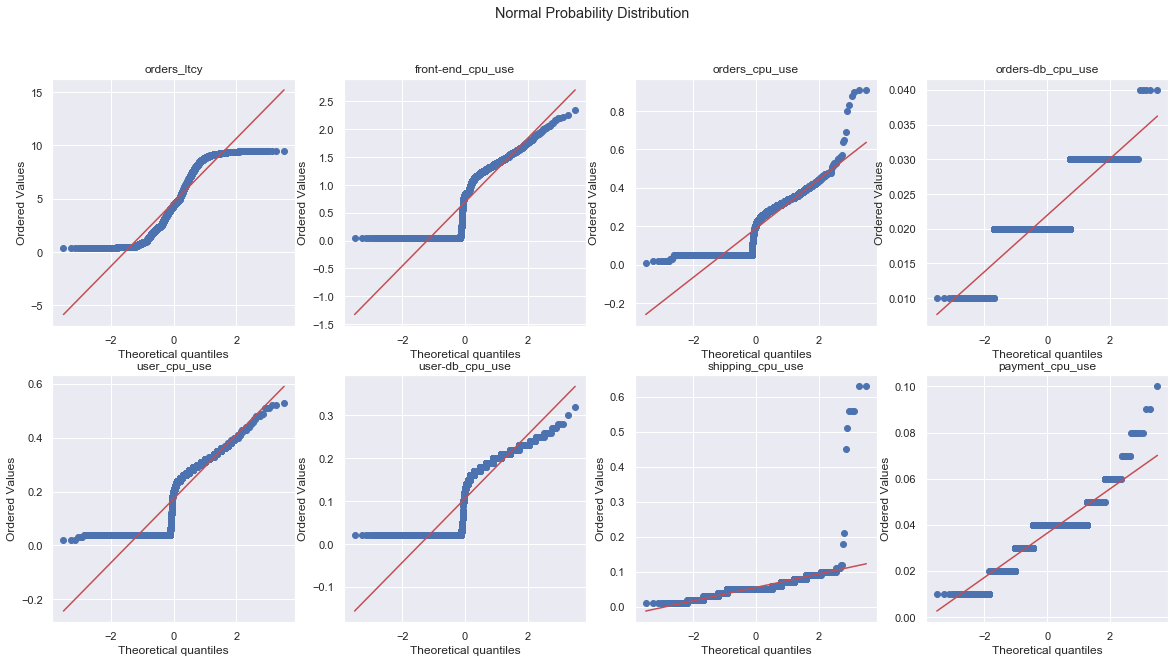

In [8]:
fig, ax = plt.subplots(2,4,figsize=(20,10))

# log_ltcy should look ok as its transformed above
stats.probplot(orders_flow_df['orders_ltcy'], plot=ax[0,0])
ax[0, 0].set_title('orders_ltcy')

stats.probplot(orders_flow_df['front-end_cpu_use'], plot=ax[0,1])
ax[0, 1].set_title('front-end_cpu_use')

stats.probplot(orders_flow_df['orders_cpu_use'], plot=ax[0,2])
ax[0, 2].set_title('orders_cpu_use')

stats.probplot(orders_flow_df['orders-db_cpu_use'], plot=ax[0,3])
ax[0, 3].set_title('orders-db_cpu_use')

stats.probplot(orders_flow_df['user_cpu_use'], plot=ax[1,0])
ax[1, 0].set_title('user_cpu_use')

stats.probplot(orders_flow_df['user-db_cpu_use'], plot=ax[1,1])
ax[1, 1].set_title('user-db_cpu_use')

stats.probplot(orders_flow_df['shipping_cpu_use'], plot=ax[1,2])
ax[1, 2].set_title('shipping_cpu_use')

stats.probplot(orders_flow_df['payment_cpu_use'], plot=ax[1,3])
ax[1, 3].set_title('payment_cpu_use')



fig.suptitle('Normal Probability Distribution')
plt.show()

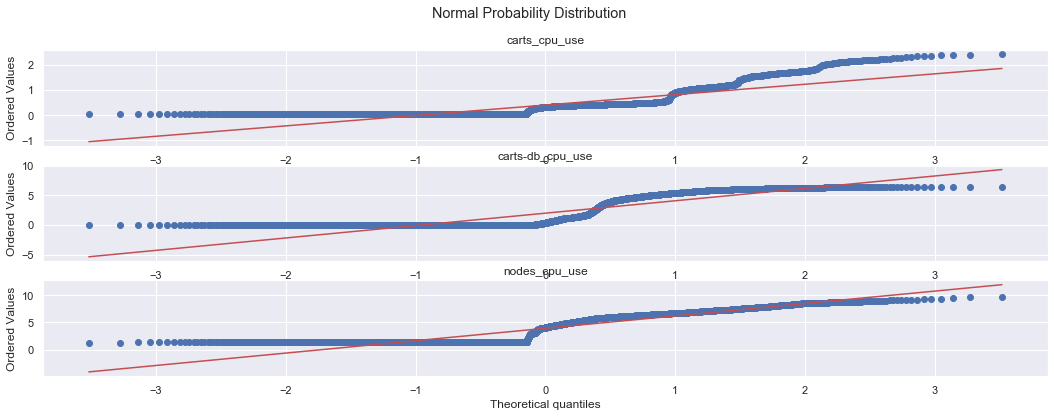

In [9]:
fig, ax = plt.subplots(3,figsize=(18,6))

stats.probplot(orders_flow_df['carts_cpu_use'], plot=ax[0])
ax[0].set_title('carts_cpu_use')

stats.probplot(orders_flow_df['carts-db_cpu_use'], plot=ax[1])
ax[1].set_title('carts-db_cpu_use')

stats.probplot(orders_flow_df['nodes_cpu_use'], plot=ax[2])
ax[2].set_title('nodes_cpu_use')

#stats.probplot(orders_flow_df['svc_req_size'], plot=ax[1,0])
#ax[1, 0].set_title('svc_req_size')

#stats.probplot(orders_flow_df['svc_resp_size'], plot=ax[1,1])
#ax[1, 1].set_title('svc_resp_size')

#stats.probplot(orders_flow_df['svc_pods'], plot=ax[1,2])
#ax[1, 2].set_title('svc_pods')

#stats.probplot(orders_flow_df['svc_req_rate'], plot=ax[2,0])
#ax[2, 0].set_title('svc_req_rate')

fig.suptitle('Normal Probability Distribution')
plt.show()

above Normal Probability Plots (MPP) illustrates so low variance for "orders-db_cpu_use" variable. Apparently, the orders-db_cpu_use is not affected when applying different loads to the application. We will drop this varible and not consider it.

In [10]:
#orders_flow_df = orders_flow_df.drop('orders-db_cpu_use', 1)
normalized_data = orders_flow_df

Text(0.5, 1.0, 'orders_ltcy NPP')

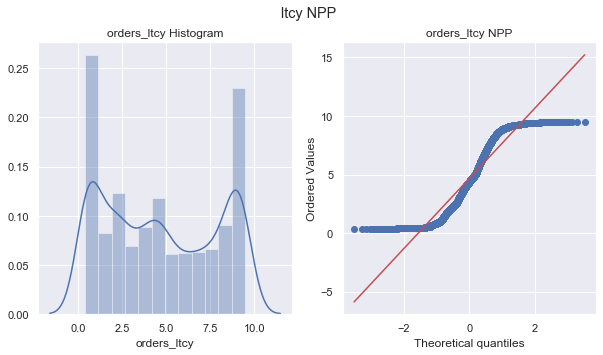

In [11]:
# orders_ltcy
#normalized_data['orders_ltcy'] = np.power(normalized_data.orders_ltcy, 0.5)

fig, ax = plt.subplots(1,2,figsize=(10,5))
fig.suptitle('ltcy NPP')

sns.distplot(normalized_data['orders_ltcy'], ax=ax[0])
ax[0].set_title('orders_ltcy Histogram')
stats.probplot(normalized_data['orders_ltcy'], plot=ax[1])
ax[1].set_title('orders_ltcy NPP')

In [12]:
orders_flow_df = normalized_data

# Checking Regression Assumptions

## Linearity

examine features to target scatterplot

In [13]:
variables = orders_flow_df.columns.values
for var in variables:
    print(var)

front-end_cpu_use
orders_cpu_use
orders-db_cpu_use
user_cpu_use
user-db_cpu_use
shipping_cpu_use
payment_cpu_use
carts_cpu_use
carts-db_cpu_use
front-end_pods
orders_pods
user_pods
shipping_pods
payment_pods
carts_pods
front-end_net_use
orders_net_use
orders-db_net_use
user_net_use
user-db_net_use
shipping_net_use
payment_net_use
carts_net_use
carts-db_net_use
nodes_cpu_use
nodes_disk_io
nodes_net_use
orders_req
orders_ltcy


Plot every variable against the latency 

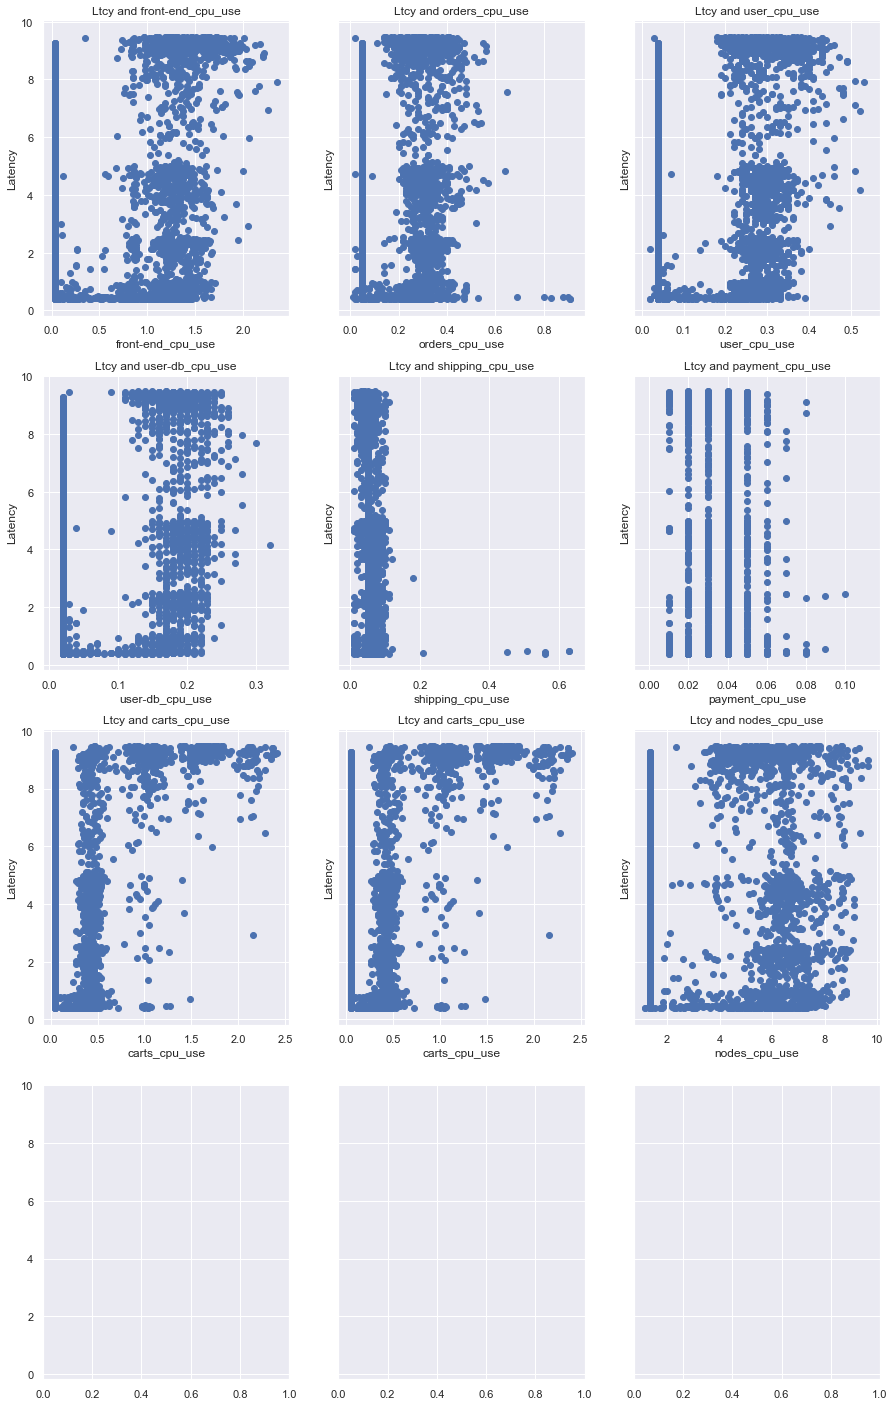

In [14]:
f, ax = plt.subplots(4, 3, sharey=True, figsize = (15,25))

ax[0,0].scatter(orders_flow_df['front-end_cpu_use'], orders_flow_df['orders_ltcy'])
ax[0,0].set_title('Ltcy and front-end_cpu_use')
ax[0,0].set_xlabel('front-end_cpu_use')
ax[0,0].set_ylabel('Latency')

ax[0,1].scatter(orders_flow_df['orders_cpu_use'], orders_flow_df['orders_ltcy'])
ax[0,1].set_title('Ltcy and orders_cpu_use')
ax[0,1].set_xlabel('orders_cpu_use')
ax[0,1].set_ylabel('Latency')

ax[0,2].scatter(orders_flow_df['user_cpu_use'], orders_flow_df['orders_ltcy'])
ax[0,2].set_title('Ltcy and user_cpu_use')
ax[0,2].set_xlabel('user_cpu_use')
ax[0,2].set_ylabel('Latency')

ax[1,0].scatter(orders_flow_df['user-db_cpu_use'], orders_flow_df['orders_ltcy'])
ax[1,0].set_title('Ltcy and user-db_cpu_use')
ax[1,0].set_xlabel('user-db_cpu_use')
ax[1,0].set_ylabel('Latency')

ax[1,1].scatter(orders_flow_df['shipping_cpu_use'], orders_flow_df['orders_ltcy'])
ax[1,1].set_title('Ltcy and shipping_cpu_use')
ax[1,1].set_xlabel('shipping_cpu_use')
ax[1,1].set_ylabel('Latency')

ax[1,2].scatter(orders_flow_df['payment_cpu_use'], orders_flow_df['orders_ltcy'])
ax[1,2].set_title('Ltcy and payment_cpu_use')
ax[1,2].set_xlabel('payment_cpu_use')
ax[1,2].set_ylabel('Latency')

ax[2,0].scatter(orders_flow_df['carts_cpu_use'], orders_flow_df['orders_ltcy'])
ax[2,0].set_title('Ltcy and carts_cpu_use')
ax[2,0].set_xlabel('carts_cpu_use')
ax[2,0].set_ylabel('Latency')

ax[2,1].scatter(orders_flow_df['carts_cpu_use'], orders_flow_df['orders_ltcy'])
ax[2,1].set_title('Ltcy and carts_cpu_use')
ax[2,1].set_xlabel('carts_cpu_use')
ax[2,1].set_ylabel('Latency')

ax[2,2].scatter(orders_flow_df['nodes_cpu_use'], orders_flow_df['orders_ltcy'])
ax[2,2].set_title('Ltcy and nodes_cpu_use')
ax[2,2].set_xlabel('nodes_cpu_use')
ax[2,2].set_ylabel('Latency')



plt.show()

In [15]:
if save:
    normalized_data.to_csv(path_or_buf=file_dir + 'order_flow_normalized_data.csv', index=True)

# Standardize Features

In [16]:
# Also save a standard normalized data to use with MLP

from sklearn.preprocessing import StandardScaler

targets = orders_flow_df['orders_ltcy']
inputs = orders_flow_df.drop(['orders_ltcy'], axis=1)

variables = inputs.columns.values

print('shape of inputs %', inputs.shape)

scaler = StandardScaler()
scaler.fit(inputs)
standarized_inputs = scaler.transform(inputs)
standarized_inputs = pd.DataFrame(standarized_inputs, columns=variables)

targets = pd.DataFrame(targets.values, columns=['orders_ltcy'])

scaled_data = pd.concat([standarized_inputs,targets], axis=1, sort=False)
scaled_data['date'] = idx
scaled_data = to_time_series(scaled_data)

if save:
     scaled_data.to_csv(path_or_buf=file_dir + 'order_flow_standardized_data.csv', index=True)
        
scaled_data.head()        
    

shape of inputs % (3175, 28)


,front-end_cpu_use,orders_cpu_use,orders-db_cpu_use,user_cpu_use,user-db_cpu_use,shipping_cpu_use,payment_cpu_use,carts_cpu_use,carts-db_cpu_use,front-end_pods,...,user-db_net_use,shipping_net_use,payment_net_use,carts_net_use,carts-db_net_use,nodes_cpu_use,nodes_disk_io,nodes_net_use,orders_req,orders_ltcy
date,,,,,,,,,,,,,,,,,,,,,
2020-03-26 19:48:22,-1.0233,-0.9974,-0.3884,-1.0117,-1.0212,-0.1614,0.3475,-0.7355,-0.8220,0.8122,...,-0.9615,-0.6505,-0.5258,-0.8491,-0.8293,-1.0157,-0.5479,-1.0140,-0.9680,3.4442
2020-03-26 19:48:37,-1.0233,-0.9974,-0.3884,-1.0117,-1.0212,-0.1614,0.3475,-0.7355,-0.8220,0.8122,...,-0.9615,-0.6505,-0.5258,-0.8491,-0.8293,-1.0157,-0.5479,-1.0140,-0.9680,2.0511
2020-03-26 20:03:22,-1.0233,-0.9974,-0.3884,-1.0117,-1.0212,-0.1614,0.3475,-0.7355,-0.8220,0.8122,...,-0.9615,-0.6505,-0.5258,-0.8491,-0.8293,-1.0157,-0.5479,-1.0140,-0.9680,7.6616
2020-03-26 20:03:37,0.8477,0.5053,1.6232,0.7343,0.6462,0.8643,0.3475,0.0774,1.8475,0.8122,...,0.3326,0.9707,0.5943,1.0994,0.7700,1.1560,0.0299,0.6460,1.0586,3.8700
2020-03-26 20:03:52,0.5961,0.2906,-0.3884,0.2029,0.4080,0.8643,0.3475,0.0357,0.8386,-1.1351,...,0.4194,0.0064,-0.4426,0.6504,0.6583,1.2672,1.5769,0.4317,0.4150,0.4600
